In [1]:
import datasets
reload(datasets);
import pandas as pd

In [2]:
import numpy as np

import matplotlib
matplotlib.use('Agg');
import matplotlib.pyplot as plt
plt.set_cmap('jet');
%matplotlib inline  

fig = plt.Figure(figsize=(18, 9), dpi=160)
gcf = plt.gcf()
gcf.set_size_inches(18, 15)
fig.set_canvas(gcf.canvas)

In [3]:
#dataset = datasets.RandomDatasetHard(nb_nodes=5, nb_edges=3, nb_examples=100, scale_free=False, seed=1993)

In [5]:
dataset = datasets.RandomDataset(scale_free=False)

In [6]:
dataset.nb_class

2

In [ ]:
#pd.DataFrame(dataset.data)[0]

In [312]:
dataset.labels[0]

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=uint8)

In [294]:
dataset.labels[0]

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,
        0.,  0.,  0.], dtype=float32)

In [90]:
dataset.sample_names[0]

'TCGA-S9-A7J2-01'

In [21]:
clinical_raw = pd.read_csv("/data/lisa/data/genomics/TCGA/PANCAN_clinicalMatrix.gz", compression='gzip', header=0, sep='\t', quotechar='"')
clinical_raw = clinical_raw.set_index("sampleID");
clinical = clinical_raw[["_PANCAN_Cluster_Cluster_PANCAN"]]
clinical = clinical.dropna()

data_raw = pd.DataFrame(dataset.data, index=dataset.sample_names)
data_raw.index.name ="sampleID"
samples = pd.DataFrame(np.asarray(dataset.sample_names), index=dataset.sample_names)
samples.index.name ="sampleID"

data_joined = data_raw.loc[clinical.index]
data_joined = data_joined.dropna()
clinical_joined = clinical.loc[data_joined.index]

print "clinical_raw", clinical_raw.shape, ", clinical", clinical.shape, ", clinical_joined", clinical_joined.shape
print "data_raw", data_raw.shape, "data_joined", data_joined.shape


clinical_raw (12811, 42) , clinical (4419, 1) , clinical_joined (3152, 1)
data_raw (10459, 16300) data_joined (3152, 16300)


In [30]:
clinical_joined["_PANCAN_Cluster_Cluster_PANCAN"].as_matrix()

array(['C10-GBM', 'C10-GBM', 'C10-GBM', ..., 'C8-BLCA', 'C2-Squamous-like',
       'C2-Squamous-like'], dtype=object)

In [317]:
pd.get_dummies(clinical_joined).as_matrix().astype(np.float)

array([[ 0.,  1.,  0., ...,  0.,  0.,  0.],
       [ 0.,  1.,  0., ...,  0.,  0.,  0.],
       [ 0.,  1.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  1.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

In [304]:
data_joined

,0,1,2,3,4,5,6,7,8,9,...,16290,16291,16292,16293,16294,16295,16296,16297,16298,16299
sampleID,,,,,,,,,,,,,,,,,,,,,
TCGA-02-0047-01,-0.529790,0.579739,-0.53927,-0.378997,0.492915,1.352055,-1.589883,-0.20617,-1.190656,-0.880486,...,3.464872,2.628541,-0.522704,3.866938,1.241904,-1.284398,0.566980,0.092402,1.943290,-4.561718
TCGA-02-0055-01,-0.031890,0.670638,-0.53927,-0.371997,0.830815,0.652055,-0.979783,-0.96357,-0.767656,0.661413,...,2.133072,2.217741,-0.522704,-0.971262,1.349504,-1.284398,0.798480,1.081903,0.103789,-0.858818
TCGA-02-2483-01,0.099510,-0.061361,-0.53927,-0.146197,0.967115,0.758055,1.845417,1.74123,-1.441856,0.143213,...,-0.546928,0.768040,-0.522704,-1.105262,0.904604,-1.284398,0.380480,-0.148397,1.656489,-4.537817
TCGA-02-2485-01,-0.440590,0.167738,-0.53927,-0.399097,0.507815,0.636954,-2.349883,1.71173,-2.345456,0.076313,...,5.297472,2.206440,-0.522704,-0.648162,0.577404,-1.284398,0.375780,-0.581798,2.801189,-4.438218
TCGA-02-2486-01,-0.319390,0.971438,-0.53927,0.115403,0.717916,1.620654,-1.599683,-0.40137,0.397444,-0.223086,...,-0.460228,2.118141,-0.522704,-0.926462,2.784904,-1.284398,1.162280,-0.889398,1.217090,-4.568118
TCGA-04-1348-01,0.049510,-0.327162,-0.53927,0.331503,-0.730885,0.701454,1.412917,0.29293,1.394344,1.498013,...,0.130672,-1.349160,-0.522704,-0.992462,0.693604,1.896202,0.782280,0.868503,1.709490,-2.036717
TCGA-04-1357-01,0.358210,0.111738,-0.53927,-0.841497,-0.133784,0.162954,0.388517,0.93143,0.949744,1.334213,...,-1.247028,1.145040,-0.522704,-1.613362,1.687704,2.590602,0.584180,0.054903,1.254189,-0.893318
TCGA-04-1362-01,-0.559490,-0.390562,-0.53927,0.273803,0.045815,-0.594246,2.933917,1.35343,1.295844,1.202913,...,-0.098728,0.807741,-0.522704,-1.613362,-0.335996,2.075502,1.037480,0.900403,1.261689,-2.990118
TCGA-04-1364-01,0.364910,-1.151961,-0.53927,-0.323197,-0.553084,-0.921845,2.274517,2.33573,-0.138356,1.309013,...,4.032072,-2.835260,-0.522704,-1.103462,-2.800196,2.882402,-0.112420,0.802202,0.630290,-2.924118


In [288]:
clinical_joined

,_PANCAN_Cluster_Cluster_PANCAN
sampleID,
TCGA-02-0047-01,C10-GBM
TCGA-02-0055-01,C10-GBM
TCGA-02-2483-01,C10-GBM
TCGA-02-2485-01,C10-GBM
TCGA-02-2486-01,C10-GBM
TCGA-04-1348-01,C9-OV
TCGA-04-1357-01,C9-OV
TCGA-04-1362-01,C9-OV
TCGA-04-1364-01,C9-OV


In [277]:
data.shape

(10459, 16300)

In [278]:
samples.shape

(10459, 1)

In [262]:
data_joined.shape

(3152, 16300)

In [112]:
data = pd.DataFrame(dataset.data, index=dataset.sample_names)
data.index.name ="sampleID"
data

,0,1,2,3,4,5,6,7,8,9,...,16290,16291,16292,16293,16294,16295,16296,16297,16298,16299
sampleID,,,,,,,,,,,,,,,,,,,,,
TCGA-S9-A7J2-01,-0.339290,-0.326562,-0.073570,-0.537197,-0.793585,0.044354,-1.067483,-0.01507,-3.387856,-0.488887,...,-1.152728,3.383340,-0.522704,-0.277662,-1.467696,-1.284398,0.189580,-2.557998,2.796289,-5.718318
TCGA-G3-A3CH-11,-0.394590,0.363938,-0.539270,-0.135697,0.428315,0.392354,-0.756583,-2.08807,-0.551956,0.189114,...,-1.046828,-6.419460,-0.522704,1.927438,1.088404,-1.284398,0.046980,-1.707498,-0.336411,1.328282
TCGA-EK-A2RE-01,-0.241690,-0.573562,-0.120070,-0.314397,0.767415,-0.485246,-1.698583,-1.43127,-0.615256,-0.496487,...,-1.556928,0.822540,-0.522704,-1.613362,-1.488796,-0.052498,0.200680,-0.356997,-1.478110,-5.299118
TCGA-44-6778-01,0.780610,-0.241961,0.998530,0.038503,0.083415,0.467955,0.239217,0.14713,-0.130656,-1.178686,...,-0.794028,1.015740,-0.522704,0.447538,1.742104,2.844702,-0.026520,-0.248697,-0.182111,3.733383
TCGA-F4-6854-01,-0.093990,-0.622962,-0.539270,-0.024997,-1.100184,-1.027546,0.283617,-1.18937,-0.014656,0.467214,...,-0.517828,2.607440,-0.522704,-0.583062,-1.114896,-1.284398,-0.667620,0.064603,0.735490,0.704382
TCGA-AB-2863-03,-0.455090,-0.865361,-0.539270,-0.088297,-0.483584,-0.150146,-4.297383,-0.51237,-2.023656,-1.543787,...,-1.976128,0.096840,-0.522704,-1.613362,-3.227096,-0.552798,-0.055520,-2.801897,-0.407611,-2.361217
TCGA-C8-A1HL-01,0.836210,0.427638,2.200330,0.605503,0.220515,-0.173945,0.301417,1.94513,2.152945,0.028613,...,-0.522028,-1.099760,1.512096,-1.012762,-0.188596,-1.284398,0.680080,0.387803,-0.645511,0.835183
TCGA-EE-A17X-06,-0.019190,-0.647462,-0.539270,0.551503,-1.221085,-1.105745,-0.817183,-1.24007,-1.042556,0.199913,...,-1.976128,-0.787860,-0.522704,-1.613362,-1.528896,-1.284398,-1.932220,0.108903,-1.184510,-1.255918
TCGA-IR-A3L7-01,-0.447289,-0.368861,2.634830,-0.205297,-1.040484,-0.746145,1.968616,0.17663,0.215445,-1.534886,...,-1.606028,-2.880660,-0.522704,-0.959562,-1.222596,-1.284398,-0.724220,-0.833497,0.321090,0.126382


In [ ]:
merged_genes = pd.merge(merged_samples, PANCAN_clinicalMatrix, on="sampleID", how='inner')



(10459, 16300)

In [ ]:
PANCAN_clinicalMatrix

In [10]:
print dataset.adj.shape
print dataset.adj

(7220, 7220)
[[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]


In [11]:
import pickle

In [12]:
import torch

In [18]:
# A = dataset.adj
# D = np.diag(dataset.adj.sum(axis=1))
# L = D-A
# L = torch.FloatTensor(L).cuda()

In [14]:
# x = torch.eig(L, eigenvectors=True)
# xx = [x[0].cpu().numpy(), x[1].cpu().numpy()]
# np.savez_compressed("tcga-eig2.npz", xx)

In [15]:
# pickle.dump( xx, open( "tcga-eig2.p", "wb" ) )

In [16]:
# print "a"

In [17]:
#xx[0]

In [20]:
#np.savez_compressed("tcga-eig2.npz", xx[0], xx[1])

In [22]:
#a = np.load("tcga-eig.npz")

In [23]:
#a["arr_0"]

In [24]:
#np.savez_compressed("tcga-eig2.npz", xx)

In [25]:
#xx[0][:,0]

In [26]:
#plt.plot(xx[0][:10,0])

In [27]:
#pickle.dump( x, open( "tcga-eig.p", "wb" ) )

In [29]:
#print "a"

In [30]:
import matplotlib.pyplot as plt
import networkx as nx

In [39]:
G2 = nx.from_numpy_matrix(dataset.adj)

In [40]:
# remove = [node for node,degree in G2.degree().items() if degree < 1 or (degree < 200 and degree > 5)]
# _ = [G2.remove_node(n) for n in remove]

# remove = [node for node,degree in G2.degree().items() if degree < 1]
# _ = [G2.remove_node(n) for n in remove]


In [41]:
len(G2.nodes())

7220

In [42]:
len(G2.edges())

247848

In [43]:
plt.rcParams['figure.figsize'] = (40, 40)

#pos=nx.spectral_layout(G2)   #G is my graph

pos=nx.spring_layout(G2)   #G is my graph
#pos=nx.circular_layout(G2)   #G is my graph

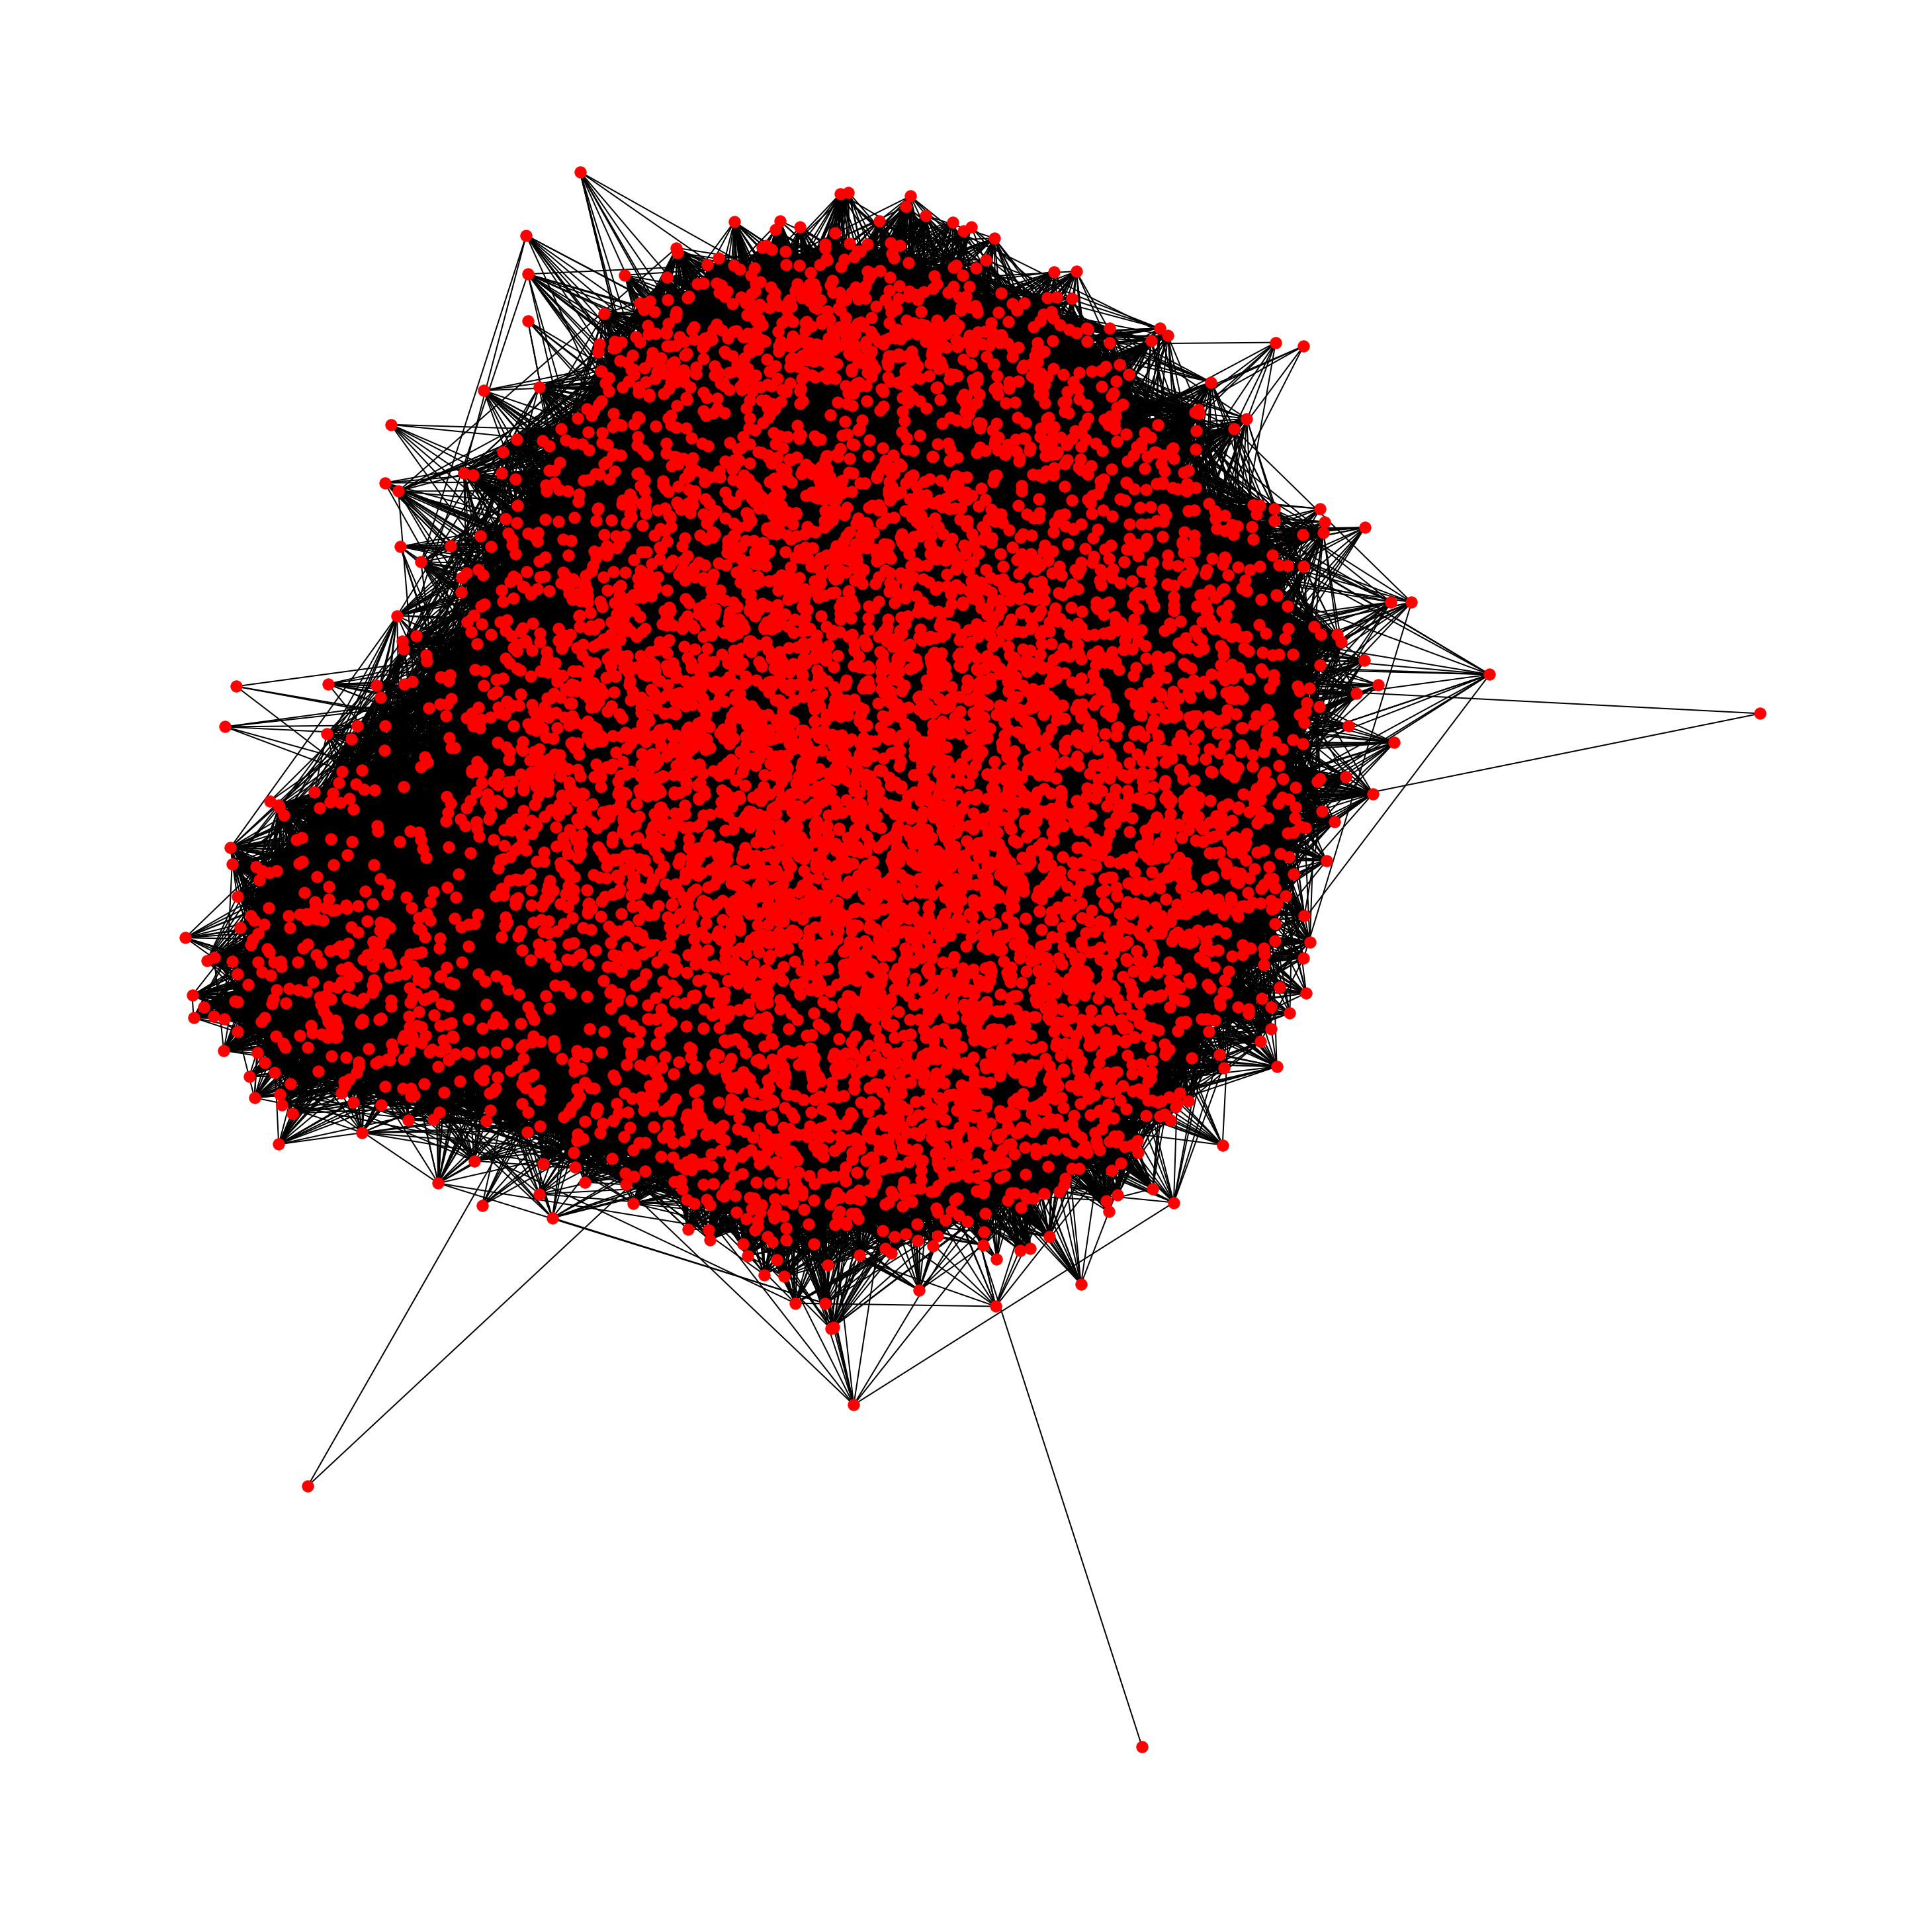

In [44]:
nx.draw(G2,pos, width=2, edge_color="black",with_labels=False)
#plt.show()
#plt.savefig("graph.png", dpi=50, facecolor='w', edgecolor='w',orientation='portrait', papertype=None, format=None,transparent=False, bbox_inches=None, pad_inches=0.1) 